![giraffe](https://raw.githubusercontent.com/jeinson/jeinson.github.io/master/images/giraffe.jpg)

# Lab 5: Feed Forward Neural Networks

In this lab activity, we will experiment with a simple yet powerful tool called a Feedforward Neural Network, implemented in (you guessed it) pytorch. This network is more complicated than linear and logistic regression that we've seen earlier, but it is a simpler form of neural network because information is only passed forward, i.e. nodes to not form a cycle. (spoiler alert, this will come later) A canonical FFNN is composed of layers of linear nodes called *perceptrons*, which take the value 1 or -1, according to some activation function, dependent on the previous layer. The parameters of a FFNN are learned exactly the same way we learned the parameters for linear and logistic regression, by gradient descent using **back propagation**

![nn_image](https://upload.wikimedia.org/wikipedia/en/5/54/Feed_forward_neural_net.gif)

As it's a right of passage for novice machine learners, we will start with the MNIST dataset, which consists of scanned images of handwritten digits. The neural net will classify each image as being a 0 through 9. (Hopefully better than Patrick is at classifying bubble buddies)

### Step 1: Load the Training Data

Fortunately MNIST comes in the box with the pytorch package, and has been formatted for input into a neural network. Half the battle is already done for you :-)

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [2]:
train_dataset = dsets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

### Step 2: Making the dataset more manageable

**Batch sizes and iterations**

Using the entire thing to train the model is unadvisable because it 1) would require a ton of RAM and 2.) could result in unstable training, as errors would accumlate very quickly. 

How big is the training dataset? If we want a batch size of 100 images, how many iterations do we need to have so that the network sees each image at least once? Training the model with mini batches of data will improve performance dramatically. 

In [3]:
#### your code here ###
len(train_dataset) / 100

600.0

**Epochs**

The formal definition of "epoch" is one complete pass of all the data through the model. How many iterations do we need to get to 5 epochs?

In [4]:
#### your code here (if you need help multiplying) ###
n_iters = len(train_dataset) / 100 * 5
n_iters

3000.0

**Bringing it all together**

Now let's specify the batch size, number of iterations, and the number ofr epochs

In [5]:
batch_size = 100
n_iters = 3000 # Your code here
n_epochs = int(n_iters / (len(train_dataset) / batch_size)) #### your code here (but it should be 5 cuz I said so) ####

Define `train_loader` and `test_loader` as one of the objects in the [torch.utils.data](https://pytorch.org/docs/stable/data.html) module. These things will load images from your dataset objects in the batch size you specify. This is one of the flagship features of Pytorch, since loading huge datasets can eat up a ton of memory. Read more about data loaders and how to use them [here](https://github.com/utkuozbulak/pytorch-custom-dataset-examples). Note you should shuffle your training data, but no need to shuffle the test data. 

In [6]:
#### your code here ####

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                        batch_size=batch_size,
                                        shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                    batch_size=batch_size,
                                    shuffle=False)

### Step 3: Create a Model Class

A feed forward neural net looks remarkably similar to the linear and logistic regression networks we played with for the past two weeks. The only difference is an extra linear and non-linear layer. 
![ExtraLayer](https://www.deeplearningwizard.com/deep_learning/practical_pytorch/images/logistic_regression_comparison_nn5.png)

The syntax for defining a neural net in pytorch should be familiar to you by now, but remember to check the API here if you get stuck

In this net, we set the dimensions of each layer as parameters that are specified when defining a model `nn.Module` object. 

In [7]:
class FeedforwardNeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetwork, self).__init__()
        
        # Linear Function
        #### your code here ####
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        
        # Non-linearity (Use a sigmoid for now)
        #### your code here ####
        self.sigmoid = nn.Sigmoid()
        
        # Another linear function (the readout)
        #### your code here ####
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    
    # Here's where we connect all the layers together
    def forward(self, x):
        # Linear function
        #### your code here ####
        out = self.fc1(x)
        
        # Non-linearity 
        #### your code here ####
        out = self.sigmoid(out)
        
        # The final linear function
        #### your code here ####
        out = self.fc2(out)
        
        # aaaaannnddd spit out the output
        #### your code here ####
        return out

### Step 4: Instantiate the Model Class

Our input size is determined by the size of the image (numbers ranging from 0 to 9) which has a width of 28 pixels and a height of 28 pixels. Hence the size of our input is 784 (28 x 28).

Our output size is what we are trying to predict. When we pass an image to our model, it will try to predict if it's 0, 1, 2, 3, 4, 5, 6, 7, 8, or 9. How many possible digits are there?

Now the tricky part is in determining our hidden layer size, that is the size of our first linear layer prior to the non-linear layer. This can be any number; a larger number implies a bigger model with more parameters. Intuitively we think a bigger model equates to a better model, but a bigger model requires more training samples to learn and converge to a good model (also called curse of dimensionality). Hence, it is wise to pick the model size for the problem at hand. Because it is a simple problem of recognizing digits, we typically would not need a big model to achieve state-of-the-art results.

On the flipside, too small of a hidden size would mean there would be insufficient model capacity to predict competently. In layman terms, too small of a capacity implies a smaller brain capacity so no matter how many training samples you give it, it has a maximum capacity in terms of its predictive power.

In [8]:
input_dim = 28*28# Your code here
hidden_dim = 100 # Your code here (Try tinkering with this if stuff goes wrong)
output_dim = 10 # Your code here

model = FeedforwardNeuralNetwork(input_dim, hidden_dim, output_dim) #### your code here ####

In [9]:
torch.cuda.is_available()

True

In [10]:
# If you have a GPU, this is where you can use it!
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

FeedforwardNeuralNetwork(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (sigmoid): Sigmoid()
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

### Step 5: Instantiate a Loss Class

For classification problems, we use cross entropy as a loss function. Don't worry too much about what it actually does. Just define the appropriate object from the `torch.nn` module. 

In [11]:
criterion = nn.CrossEntropyLoss() #### your code here ####

### Step 6: Instantitate an Optimizer Class

In terms of updating your parameters, we still follow the basic premace of $\theta_{t+1} = \theta_{t} - \eta \cdot \nabla_{\theta_t}$, where $\theta$ are the model parameters, $\eta$ is the learning rate and $\nabla_\theta$ is the gradient. For now we're gonna stick with stochastic gradient descent for the optimizer. It's pretty much the duct tape of ML. As for a learning rate, start with 0.1, but feel free to change it up later if you need. 

In [12]:
learning_rate = 0.1 #### your code here ###
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) #### your code here ###

![T_time](https://media1.tenor.com/images/b04545d91916611c2c2cd61cc3854d2d/tenor.gif)

<center>Time Out!</center>

Take a few minutes to understand what's going on at this point. First off, how many parameters does each layer of the network have? What values to the parameters take when initializing the model? Do you see how at the core, we're really just doing matrix the same operations as in regression? The diagram below shows the interaction amongst our input $X$ and out linear layers' parameters $A_1$, $B_1$, $A_2$, and $B_2$ to reach the final size of 10 x 1.

![net_image](https://www.deeplearningwizard.com/deep_learning/practical_pytorch/images/nn1_params3.png)

### Step 7: Train the Model

This may be the most confusing part, especially accessing data from your training data loader object. To get a feel for how it works, make a plot of the first 25 digits in the first batch of MNIST images, and label the x axis with the true label. Make sure to use the `train_loader` object. 

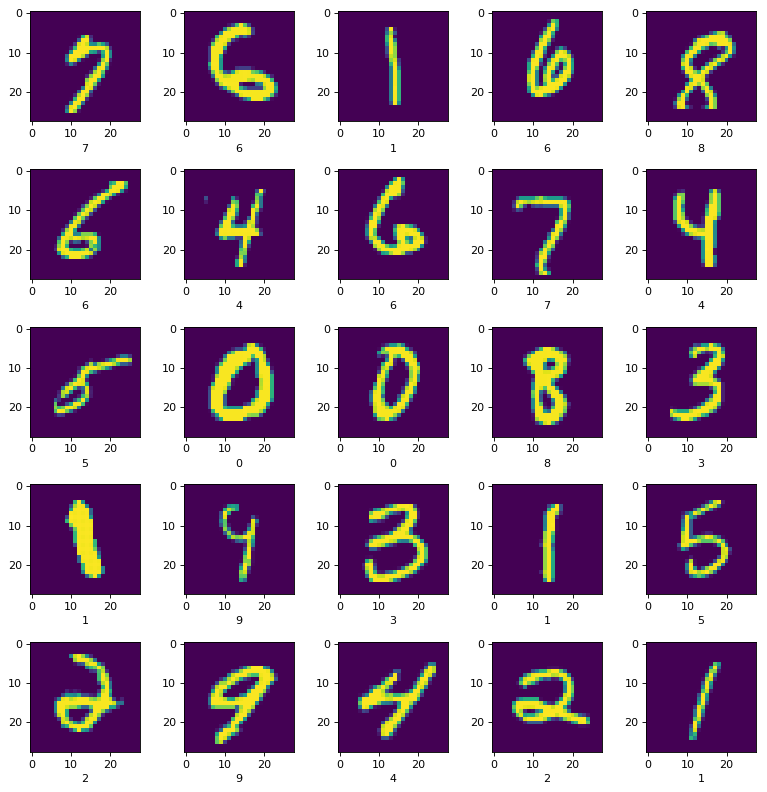

In [14]:
import matplotlib.pyplot as plt
#### your code here ###

x = next(iter(train_loader))

plotData = x[0][0:25]
labelData = x[1][0:25]

fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
for i in range(25):
    plt.subplot(5,5,i + 1, xmargin = 2.0)
    plt.xlabel(str(labelData[i].numpy()))
    plt.imshow(plotData[i][0].numpy())
    plt.tight_layout()
plt.show()

Training follows the same process as we've seen previously 
1. Convert inputs to tensors with gradient accumulation capabilities
2. Zero the gradients
3. Get a new output given the current parameters
4. Calculate the loss 
5. Get new gradients w.r.t. the model parameters
6. Update the parameters using the gradients, in a direction toward the optimal solution
7. *REPEAT!!*

Now fill in the missing code to train the model. Depending on how powerful your CPU (or GPU) is, training may take a few minutes. For debugging, try reducing the number of epochs or batch size, just to make sure stuff is working properly. 

In [15]:
iter = 0
for epochs in range(n_epochs):
    
    # This will load images 100 at a time, as specified when you defined this thing
    for i, (images, labels) in enumerate(train_loader):
        
        # Flatten the images to a torch tensor of 1x(28*28) vectors
        # (try the .view method)
        # And make sure they accumulate gradients!
        #### your code here ####
        images = images.view(-1, 28*28).requires_grad_().to(device)
        labels = labels.to(device)
        
        # Clear gradients w.r.t. parameters
        #### your code here ####
        optimizer.zero_grad()
        
        # Forward pass to get the output/logits
        #### your code here ####
        output = model(images)
        
        # Calculate Loss
        #### your code here ####
        loss = criterion(output, labels)
        
        # Get gradients w.r.t. the parameters
        #### your code here ####
        loss.backward()
        
        # Update the parameters
        #### your code here ####
        optimizer.step()
        
        iter += 1
        
        # Every 500 iterations, check up on how the model is doing, 
        # by printing the loss and the training accuracy on the held out data. 
        # Accuracy = (number of images correctly identified) / (total number of images)
        #### your code here ####
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28).requires_grad_().to(device)
                labels = labels.to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100. * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
        

Iteration: 500. Loss: 0.5953152775764465. Accuracy: 85
Iteration: 1000. Loss: 0.3924850523471832. Accuracy: 89
Iteration: 1500. Loss: 0.3864123523235321. Accuracy: 90
Iteration: 2000. Loss: 0.16758280992507935. Accuracy: 91
Iteration: 2500. Loss: 0.3784589469432831. Accuracy: 91
Iteration: 3000. Loss: 0.2064964473247528. Accuracy: 91


Nice work! You trained a neural net! If you got a training accuracy of over 90%, you can reward yourself with a picture of my cat helping me write this lab...

<center><form method="get" action="https://raw.githubusercontent.com/jeinson/jeinson.github.io/master/images/20190220_095041.jpg">
    <button type="submit">Click here for LULz</button>
</form></center>

## Bonus challenge

From the last round of training, select the images that the neural net failed to classify correctly and plot them. Why do you think the net was unable to correctly identify these digits?

In [ ]:
x = list(test_loader)

In [ ]:
x

In [ ]:
((predicted == labels).numpy() == 0)

*Citation*:
This lab was developed from www.deeplearningwizard.com. With some googling, I'm sure you can find it, but if you copy-paste the answers you won't really learn anything!